In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('movie_metadata.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [79]:
for i in range(len(df)):
    df.loc[i, 'len'] = len(str(df.loc[i, 'movie_title']))

In [81]:
df['len'].unique()

array([ 7, 41,  8, 22, 55, 12, 13, 24, 39, 35, 17, 18, 43, 16, 44, 15, 42,
       23, 11, 36, 19, 10, 27, 20, 32, 26, 25, 14, 21, 31, 51,  6,  5, 63,
        3,  9, 38, 28, 29, 34, 57, 47,  4, 37, 48, 46, 40, 45, 49, 50, 30,
       33,  2, 59, 60, 56, 84, 54, 87, 53, 72, 69, 80, 67])

In [42]:
df['movie_title'].unique()

array(['Avatar\xa0', "Pirates of the Caribbean: At World's End\xa0",
       'Spectre\xa0', ..., 'A Plague So Pleasant\xa0',
       'Shanghai Calling\xa0', 'My Date with Drew\xa0'], dtype=object)

In [61]:
len(str(df.loc[0, 'movie_title']))

7

In [63]:
len(df)

5043

In [83]:
df['len'] = df['movie_title'].apply(lambda x: len(x) if pd.notnull(x) else 0)
# as df['movie_title'] returns a series we cant use df['len'] = len(str(df['movie_title']))

In [97]:
X = np.array(df['len'].value_counts())

In [99]:
X

array([330, 328, 306, 294, 284, 274, 267, 264, 239, 226, 219, 213, 176,
       139, 138, 138, 138, 109,  91,  85,  82,  74,  69,  65,  51,  47,
        43,  36,  35,  31,  30,  24,  21,  21,  18,  17,  14,  14,  13,
         9,   8,   8,   7,   5,   5,   4,   4,   4,   4,   3,   3,   2,
         2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [121]:
## Important

values = df['len'].value_counts().index.to_numpy()
counts = df['len'].value_counts().values


<Figure size 500x500 with 0 Axes>

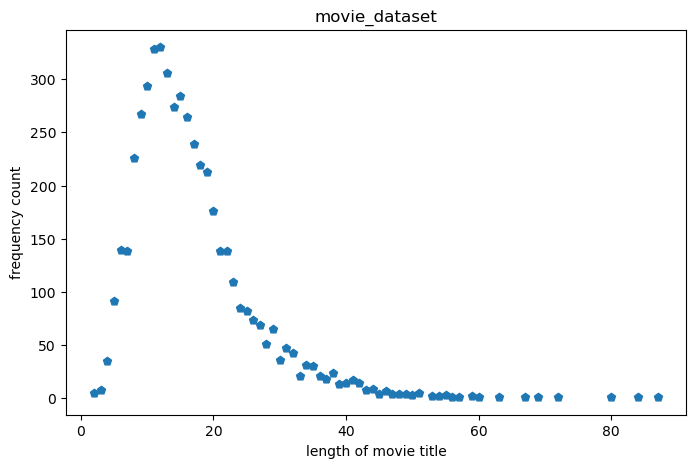

In [133]:
plt.figure(figsize = (5,5))
plt.figure(figsize = (8,5))
plt.scatter(values, counts, marker = 'p')
plt.xlabel('length of movie title')
plt.ylabel('frequency count')
plt.title('movie_dataset')
plt.show()

In [135]:
df.columns

Index([                    'color',             'director_name',
          'num_critic_for_reviews',                  'duration',
         'director_facebook_likes',    'actor_3_facebook_likes',
                    'actor_2_name',    'actor_1_facebook_likes',
                           'gross',                    'genres',
                    'actor_1_name',               'movie_title',
                 'num_voted_users', 'cast_total_facebook_likes',
                    'actor_3_name',      'facenumber_in_poster',
                   'plot_keywords',           'movie_imdb_link',
            'num_user_for_reviews',                  'language',
                         'country',            'content_rating',
                          'budget',                'title_year',
          'actor_2_facebook_likes',                'imdb_score',
                    'aspect_ratio',      'movie_facebook_likes',
                              5043,                       'len'],
      dtype='object')

In [149]:
titles = (df.get('movie_title'))

In [151]:
for t in titles:
    length = len(t)
    print(length)

7
41
8
22
55
12
13
8
24
39
35
17
18
43
16
13
41
13
44
15
42
23
11
36
19
10
8
27
11
15
8
13
11
20
22
20
36
32
26
25
13
7
14
12
21
10
12
27
24
22
17
36
12
31
51
18
6
17
7
12
5
18
18
21
63
18
16
3
20
9
5
15
38
14
14
17
11
28
11
16
11
28
11
31
11
9
36
20
13
11
15
18
29
25
35
24
13
10
20
34
25
36
19
38
26
9
32
16
9
19
57
13
13
10
42
36
8
12
34
12
14
28
47
25
23
7
20
21
19
16
5
5
8
20
13
35
12
21
10
16
19
24
17
16
13
4
22
5
35
16
13
11
16
8
16
37
22
23
17
23
10
11
27
14
8
9
16
5
22
7
34
35
24
48
42
13
20
23
8
13
6
6
23
21
14
8
32
42
5
18
12
14
5
5
25
41
10
12
9
46
40
9
38
9
20
55
45
38
18
6
8
10
35
20
13
17
18
15
31
23
23
18
39
11
12
13
32
11
16
8
26
8
12
16
15
9
45
45
15
14
42
11
29
12
27
29
8
13
49
15
20
12
20
12
15
17
10
12
19
17
23
23
11
18
10
11
13
24
13
22
50
28
4
19
9
18
14
26
12
24
11
15
22
10
16
40
14
19
27
15
18
10
27
15
15
7
17
28
25
18
18
7
26
4
5
12
12
14
24
15
18
12
46
9
9
16
17
18
12
16
24
29
11
18
21
18
18
19
10
19
16
13
18
19
22
27
11
17
13
46
38
12
24
14
18
31
26
23
10
16
1

In [157]:
freq_title = {}

for t in titles:
    length = len(t)

    try:
        freq_title[length] += 1
    except:
        freq_title[length] = 1

print(freq_title)

{7: 138, 41: 17, 8: 226, 22: 138, 55: 3, 12: 330, 13: 306, 24: 85, 39: 13, 35: 30, 17: 239, 18: 219, 43: 8, 16: 264, 44: 9, 15: 284, 42: 14, 23: 109, 11: 328, 36: 21, 19: 213, 10: 294, 27: 69, 20: 176, 32: 43, 26: 74, 25: 82, 14: 274, 21: 138, 31: 47, 51: 5, 6: 139, 5: 91, 63: 1, 3: 8, 9: 267, 38: 24, 28: 51, 29: 65, 34: 31, 57: 1, 47: 4, 4: 35, 37: 18, 48: 4, 46: 7, 40: 14, 45: 4, 49: 4, 50: 3, 30: 36, 33: 21, 2: 5, 59: 2, 60: 1, 56: 1, 84: 1, 54: 2, 87: 1, 53: 2, 72: 1, 69: 1, 80: 1, 67: 1}


In [159]:
# We use numpy to convert the data to be used in matpplotlib
